In [43]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [73]:
A = np.random.normal(-4,2, 1000)
A[A<0] = 0
A = np.floor(A*100)/100


In [74]:
class Fold():
    def __init__(self, target_lenght, target_sum, name=None):
        self.indexs = []
        self.lenght = target_lenght
        self.target_sum = target_sum
        self.sum = 0
        self.hunger = np.infty
        self.name = name
    
    def add(self, a):
#         print(self.name)
        self.indexs.append(a[1])
        self.sum += a[0]
        if self.lenght == len(self.indexs):
            print(f'fold {self.name} done!')
            return True
        self.hunger = (self.target_sum - self.sum)/(self.lenght - len(self.indexs))
        return False

In [75]:
nfolds = 10
folds = [Fold(len(A)//nfolds, np.sum(A)/nfolds, name=i) for i in range(nfolds)]
done_folds = []

A_s = [(a,i) for i,a in enumerate(A)]
A_s.sort()
A_s = A_s[::-1]
    
for a in tqdm(A_s):
    # determine the hungriest fold
    j = np.argmax([f.hunger for f in folds])
    if folds[j].add(a):
        done_folds.append(folds.pop(j))

  0%|          | 0/1000 [00:00<?, ?it/s]

2 done!
6 done!
5 done!
4 done!
9 done!
1 done!
0 done!
3 done!
8 done!
7 done!


In [76]:
for f in done_folds:
#     print(len(f.indexs))
    print(f.sum)

1.61
1.62
1.63
1.64
1.65
1.67
1.7
1.73
1.76
1.78


<IPython.core.display.Javascript object>


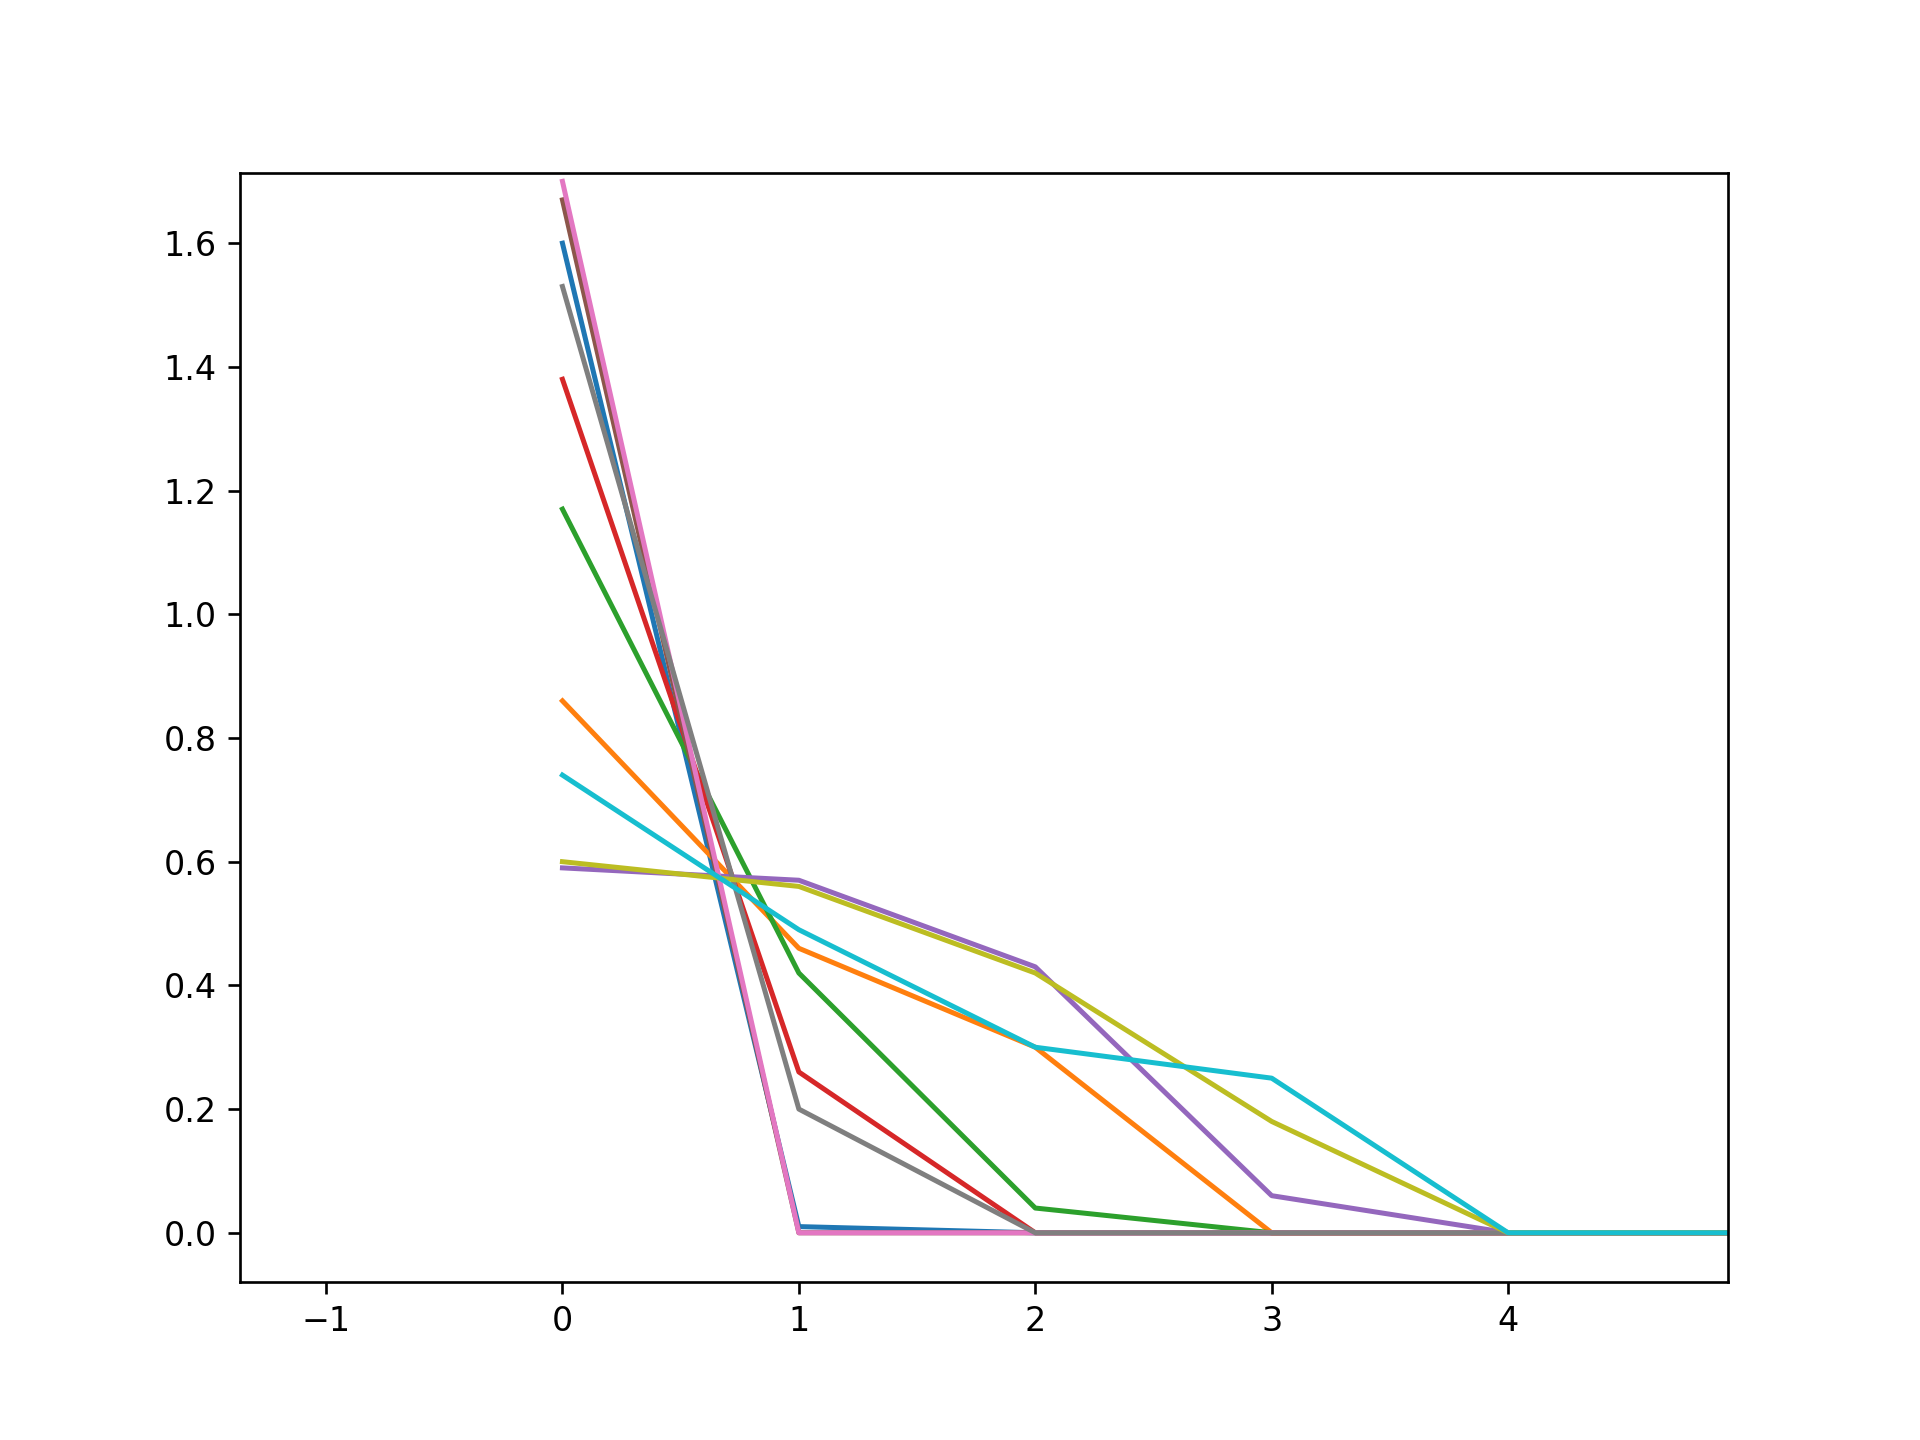

In [77]:
%matplotlib notebook
fig,ax = plt.subplots(figsize=(8,6))
for f in done_folds:
    plt.plot(A[f.indexs])

In [89]:
def compose_permutations(permutations):
    l = len(permutations[0])
    for p in permutations[1:]:
        if len(p) != l:
            raise ValueError('All permutations must have the same length')
    ps = permutations[::-1]
    p = ps[0]
    for _p in ps[1:]:
        p = _p[p]
    return p

In [91]:
a = np.arange(200)
p1 = np.random.permutation(a)
p2 = np.random.permutation(a)
p3 = np.random.permutation(a)
a = a*2

In [92]:
b = a[p1]
b2 = b[p2]
c = b2[p3]

p_c=p1[p2[p3]]
c2 = a[p_c]

In [93]:
p_c == compose_permutations([p1,p2,p3])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [88]:
c == c2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [83]:
p_i = np.argsort(p_c)
c[p_i]

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

In [1]:
import Learn2_new as ln
from importlib import reload

Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy
Successfully imported cartopy


In [42]:
reload(ln)

<module 'Learn2_new' from '/media/alessandro/OS/Users/ale57/Documents/0. Lyon/WORK/Climate-Learning/PLASIM/Learn2_new.py'>

In [8]:
import inspect
import json

In [24]:
def get_default_params(func, recursive=False):
    '''
    Given a function returns a dictionary with the default values of its parameters
    '''
    s = inspect.signature(func)
    default_params = {
        k:v.default for k,v in s.parameters.items()
        if v.default is not inspect.Parameter.empty
    }
    if recursive:
        possible_other_params = [k for k,v in s.parameters.items() if (v.default is inspect.Parameter.empty and k.endswith('_kwargs'))]
        print(possible_other_params)
        for k in possible_other_params:
            func_name = k.rsplit('_',1)[0] # remove '_kwargs'
            try:
                default_params[k] = get_default_params(__dict__[func_name], recursive=True)
            except:
                print(f'Could not find function {func_name}')
    return default_params



In [43]:
ln.get_default_params(ln.prepare_data, recursive=True)

['load_data_kwargs', 'make_XY_kwargs', 'roll_X_kwargs']
[]
[]
[]


{'premix_seed': 0,
 'nfolds': 10,
 'load_data_kwargs': {'dataset_years': 8000,
  'year_list': None,
  'sampling': '',
  'Model': 'Plasim',
  'area': 'France',
  'filter_area': 'France',
  'lon_start': 0,
  'lon_end': 128,
  'lat_start': 0,
  'lat_end': 22,
  'mylocal': '/local/gmiloshe/PLASIM/',
  'fields': ['t2m', 'zg500', 'mrso_filtered']},
 'make_XY_kwargs': {'label_field': 't2m',
  'time_start': 30,
  'time_end': 120,
  'T': 14,
  'tau': 0,
  'percent': 5,
  'threshold': None},
 'roll_X_kwargs': {'axis': 'lon', 'steps': 64}}

In [14]:
with open('test.json', 'w') as j:
    json.dump(d, j, indent=4)

In [10]:
with open('test.json', 'r') as j:
    d2 = json.load(j)

In [12]:
d2

{'dataset_years': 8000,
 'year_list': None,
 'sampling': '',
 'Model': 'Plasim',
 'area': 'France',
 'filter_area': 'France',
 'lon_start': 0,
 'lon_end': 128,
 'lat_start': 0,
 'lat_end': 22,
 'mylocal': '/local/gmiloshe/PLASIM/',
 'fields': ['t2m', 'zg500', 'mrso_filtered']}

In [1]:
d1 = {'a': 1, 'b': 20}
d2 = {'b':20, 'a':1}
d1 == d2

True

In [23]:
a = 12
b = '12'
try:
    b = type(a)(b)
except Exception:
    pass

In [28]:
with open('test.txt', 'a') as f:
    f.write('uula\n')

In [4]:
import time
import Learn2_new as ln

/media/alessandro/OS/Users/ale57/Documents/0. Lyon/WORK/Climate-Learning/ERA
Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy
Successfully imported cartopy


In [3]:
def execution_time(func):
    def wrapper(*args, **kwargs):
        time_start = time.time()
        print(f'Running {func.__name__}\n')
        r = func(*args, **kwargs)
        print(f'{func.__name__}: completed in {time.time() - time_start}\n\n')
        return r
    return wrapper

In [7]:
def test(a=4):
    print(a)

In [8]:
ln.get_default_params(test)

{}

In [9]:
test(4)

Running test

4
test: completed in 0.0006799697875976562




In [13]:
len('Running k_fold_cross_val')

24